In [3]:
import requests
data_mos_key = "57f2cae75fd5447e4976a7568873f9b1"

In [3]:
import requests
data_mos_key = "57f2cae75fd5447e4976a7568873f9b1"
url = f'https://apidata.mos.ru/v1/datasets?$skip=1&$top=300&$inlinecount=allpages&api_key={data_mos_key}'
resp = requests.get(url).json()
for item in resp['Items']:
    print(item['Id'], ' ', item['Caption'])

495   Кинотеатры
498   Аттракционы в парках и на площадках
499   Организации, находящиеся в ведомственном подчинении Департамента жилищно-коммунального хозяйства города Москвы
500   (Архив) Государственные казенные учреждения «Инженерные службы» районов города Москвы
501   (Архив) Аптеки
502   Больницы детские и специализированные
503   Поликлиническая помощь взрослым
504   Госпитали для ветеранов
505   Поликлиническая помощь детям
506   Стоматологические поликлиники детские
507   Диспансеры
508   (Архив) Дома ребенка
509   Женские консультации
510   Санатории
512   Молочные кухни
514   Родильные дома
515   Станции переливания крови
516   Скорая и неотложная медицинская помощь
517   Больницы взрослые
518   Стоматологические поликлиники взрослые
519   Хосписы
520   (Архив) Паспортизация квартир в домах-новостройках, строительство которых выполнено за счет городского бюджета и по инвестиционным контрактам
521   (Архив) Земельные участки, находящиеся в собственности города Москвы
522   Ре

In [4]:
# 1078 - результаты ГИА
url = f'https://apidata.mos.ru/v1/datasets/1078/rows?api_key={data_mos_key}'
resp = requests.get(url)
import pandas as pd

resp_items = [ x['Cells'] for x in resp.json()]
df = pd.DataFrame(resp_items)

In [6]:

print(df)

      global_id                                           FullName  \
0      46710630  Государственное бюджетное общеобразовательное ...   
1      46710654  Государственное бюджетное профессиональное обр...   
2      46710668  Государственное бюджетное общеобразовательное ...   
3      46710676  Государственное бюджетное общеобразовательное ...   
4      46710679  Государственное бюджетное образовательное учре...   
...         ...                                                ...   
8634   58218634                                                      
8635   58218635                                                      
8636   58218636                                                      
8637   58218637                                                      
8638   58218638                                                      

              ShortName                                       LegalAddress  \
0     ГБОУ лицей № 1557           124536, г. Москва, Зеленоград, корп. 509   
1  

In [6]:
# df.index = pd.to_datetime(df['ExamDate'])

In [7]:
# df = df.drop(columns='ExamDate')

In [8]:
# df = df.sort_values(by='ExamDate')
# df.head()

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='AVGScore'>)

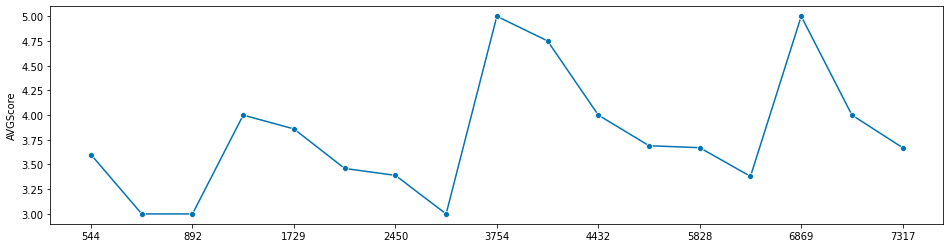

In [9]:
from sktime.utils.plotting import plot_series
plot_series(df[df['FullName']=="Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 97»"]['AVGScore'])

In [10]:
df[(df['FullName']=="Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 97»") & (df['SubjectName']=='русский')]

,global_id,FullName,ShortName,LegalAddress,ExamDate,SubjectName,PassedQuantity,AVGScore
892,46714908,Государственное бюджетное общеобразовательное ...,ГБОУ школа № 97,"121352, г. Москва, ул.Кременчугская, д.46",18.06.2015,русский,2,3.00
1729,46718861,Государственное бюджетное общеобразовательное ...,ГБОУ школа № 97,"121352, г. Москва, ул.Кременчугская, д.46",03.06.2015,русский,139,3.86


In [11]:
df.index = df.index.to_period('W')

AttributeError: 'RangeIndex' object has no attribute 'to_period'

In [12]:
df[(df['FullName']=="Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 97»") & (df['SubjectName']=='русский')]

,global_id,FullName,ShortName,LegalAddress,ExamDate,SubjectName,PassedQuantity,AVGScore
892,46714908,Государственное бюджетное общеобразовательное ...,ГБОУ школа № 97,"121352, г. Москва, ул.Кременчугская, д.46",18.06.2015,русский,2,3.00
1729,46718861,Государственное бюджетное общеобразовательное ...,ГБОУ школа № 97,"121352, г. Москва, ул.Кременчугская, д.46",03.06.2015,русский,139,3.86


In [13]:
df[('97' in df['FullName'])]

KeyError: False

In [8]:
names = df['FullName'].unique()
dates = df['ExamDate'].unique()

arr = []
for date in dates:
    d = {}
    d['ExamDate'] = date
    for name in names:
        d[name] = df[(df['FullName'] == name) & (df['ExamDate'] == date)].values.tolist()
        if len(d[name])>0:
            # get open value
            d[name] = d[name][0][len(d[name][0])-1]
            print(d[name])
        else:
            d[name] = 0

    arr.append(d)

3.0
3.0
4.5
3.5
4.5
3.33
3.93
3.0
3.0
4.0
4.0
3.33
4.0
3.5
4.52
4.0
4.08
3.81
4.0
3.38
4.5
4.33
3.67
3.8
3.8
3.0
3.29
3.55
2.75
3.92
2.0
4.46
3.78
3.43
5.0
4.73
4.27
4.2
3.0
3.0
4.0
3.5
3.6
4.41
3.0
4.0
3.5
3.0
3.93
4.27
3.56
4.5
4.0
4.0
4.0
3.0
3.67
4.33
4.0
4.26
4.0
3.8
3.29
4.33
3.0
2.0
4.29
3.5
4.0
3.5
4.44
3.8
4.14
4.2
3.5
4.4
2.8
4.13
3.5
3.0
4.0
4.33
4.0
3.64
3.8
4.0
3.2
4.0
3.89
3.29
3.75
4.1
4.03
3.92
5.0
3.5
3.95
3.78
3.55
4.46
3.78
4.0
4.25
3.5
3.5
3.64
3.86
4.0
3.94
3.52
3.67
4.67
4.0
4.0
4.0
5.0
3.88
3.5
3.59
4.36
4.0
4.13
4.0
3.64
4.33
3.5
3.44
4.0
3.0
4.0
3.0
4.11
4.0
3.8
3.75
5.0
4.3
3.0
4.0
4.33
3.64
4.17
3.7
3.83
3.58
3.4
3.78
3.5
4.0
3.5
3.0
4.0
3.0
3.71
5.0
3.0
4.0
3.55
4.0
4.63
3.0
4.08
2.5
3.0
3.25
3.0
3.97
4.22
3.88
3.57
4.32
3.33
4.0
3.91
2.0
3.83
4.0
3.9
3.33
4.24
3.43
3.0
4.33
4.0
3.5
3.36
4.36
4.0
5.0
3.67
3.75
3.68
4.33
3.67
3.5
4.0
4.6
3.0
3.5
3.4
4.0
3.5
4.33
4.0
3.4
4.29
4.0
4.0
4.0
5.0
3.25
3.71
2.0
4.0
4.0
4.06
3.79
3.67
4.0
3.4
3.92
3.33
4.0
4.54
3.88


In [17]:
standartize_gia = pd.DataFrame(data=arr)
standartize_gia.head(5)

,ExamDate,Государственное бюджетное общеобразовательное учреждение города Москвы «Лицей № 1557»,Государственное бюджетное профессиональное образовательное учреждение города Москвы «Колледж автоматизации и информационных технологий № 20»,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 2129» имени Героя Советского Союза П.И. Романова,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 51»,Государственное бюджетное образовательное учреждение города Москвы средняя общеобразовательная школа № 870,Государственное бюджетное образовательное учреждение города Москвы средняя общеобразовательная школа с углубленным изучением английского языка № 1416,Государственное бюджетное профессиональное образовательное учреждение города Москвы «Образовательный комплекс «Юго-Запад»,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа с углубленным изучением иностранного языка № 1231 имени В.Д. Поленова»,Государственное бюджетное образовательное учреждение города Москвы средняя общеобразовательная школа с углубленным изучением английского языка № 1280,...,Государственное бюджетное образовательное учреждение города Москвы средняя общеобразовательная школа № 14,Государственное бюджетное образовательное учреждение города Москвы средняя общеобразовательная школа № 9,Государственное бюджетное образовательное учреждение города Москвы гимназия № 1404 «Гамма»,Государственное автономное образовательное учреждение среднего профессионального образования города Москвы Технологический колледж № 24,Государственное бюджетное образовательное учреждение города Москвы специальная (коррекционная) общеобразовательная школа-интернат IV вида № 2,Государственное бюджетное образовательное учреждение города Москвы кадетская школа-интернат № 5 «Преображенский кадетский корпус»,Государственное бюджетное образовательное учреждение города Москвы средняя общеобразовательная школа с углубленным изучением иностранного (английского) языка № 1241,Государственное бюджетное образовательное учреждение города Москвы специальная (коррекционная) общеобразовательная школа-интернат VII вида № 73,Государственное бюджетное образовательное учреждение среднего профессионального образования города Москвы колледж архитектуры и строительства № 7,
0,29.05.2015,3.79,0.00,4.44,2.5,4.23,3.57,3.69,3.25,4.0,...,3.45,3.71,4.0,0.0,3.0,4.0,3.64,0.0,0.0,4.00
1,18.06.2015,3.00,2.71,3.00,2.8,3.00,3.00,2.50,2.67,0.0,...,2.50,2.64,3.0,0.0,0.0,0.0,2.71,2.0,0.0,3.00
2,24.04.2015,0.00,0.00,3.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
3,10.06.2015,3.50,0.00,4.00,4.0,4.00,3.00,0.00,0.00,4.5,...,4.00,0.00,5.0,0.0,0.0,0.0,4.00,0.0,0.0,4.00
4,05.06.2015,4.10,0.00,4.00,3.5,3.29,4.00,4.10,4.00,4.0,...,4.00,3.00,4.0,0.0,4.0,4.5,3.50,0.0,0.0,3.33


In [9]:
from sktime.utils.plotting import plot_series
plot_series(standartize_gia['Государственное бюджетное общеобразовательное учреждение города Москвы «Лицей № 1557»'], standartize_gia['Государственное бюджетное образовательное учреждение города Москвы средняя общеобразовательная школа с углубленным изучением английского языка № 1416'], standartize_gia['Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 51»'], standartize_gia['Государственное бюджетное профессиональное образовательное учреждение города Москвы «Образовательный комплекс «Юго-Запад»'])

NameError: name 'standartize_gia' is not defined

In [10]:
resp = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')
json_data = resp.json()

In [13]:
valute_df = pd.DataFrame(json_data)

In [16]:
valute_df.index = pd.to_datetime(valute_df['Date'])
valute_df = valute_df.drop(columns='Date')
valute_df = valute_df.sort_values(by='Date')


KeyError: 'Date'

In [17]:
valute_df

,PreviousDate,PreviousURL,Timestamp,Valute
Date,,,,
2022-05-14 11:30:00+03:00,2022-05-13T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2022/05/13/dail...,2022-05-15T20:00:00+03:00,"{'ID': 'R01060', 'NumCode': '051', 'CharCode':..."
2022-05-14 11:30:00+03:00,2022-05-13T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2022/05/13/dail...,2022-05-15T20:00:00+03:00,"{'ID': 'R01010', 'NumCode': '036', 'CharCode':..."
2022-05-14 11:30:00+03:00,2022-05-13T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2022/05/13/dail...,2022-05-15T20:00:00+03:00,"{'ID': 'R01020A', 'NumCode': '944', 'CharCode'..."
2022-05-14 11:30:00+03:00,2022-05-13T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2022/05/13/dail...,2022-05-15T20:00:00+03:00,"{'ID': 'R01100', 'NumCode': '975', 'CharCode':..."
2022-05-14 11:30:00+03:00,2022-05-13T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2022/05/13/dail...,2022-05-15T20:00:00+03:00,"{'ID': 'R01115', 'NumCode': '986', 'CharCode':..."
2022-05-14 11:30:00+03:00,2022-05-13T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2022/05/13/dail...,2022-05-15T20:00:00+03:00,"{'ID': 'R01090B', 'NumCode': '933', 'CharCode'..."
2022-05-14 11:30:00+03:00,2022-05-13T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2022/05/13/dail...,2022-05-15T20:00:00+03:00,"{'ID': 'R01350', 'NumCode': '124', 'CharCode':..."
2022-05-14 11:30:00+03:00,2022-05-13T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2022/05/13/dail...,2022-05-15T20:00:00+03:00,"{'ID': 'R01775', 'NumCode': '756', 'CharCode':..."
2022-05-14 11:30:00+03:00,2022-05-13T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2022/05/13/dail...,2022-05-15T20:00:00+03:00,"{'ID': 'R01375', 'NumCode': '156', 'CharCode':..."


In [22]:
resp_2022_14_05 = requests.get('https://www.cbr-xml-daily.ru/archive/2022/05/14/daily_json.js')
print(resp_2022_14_05.json())

ConnectionError: HTTPSConnectionPool(host='www.cbr-xml-daily.ru', port=443): Max retries exceeded with url: /archive/2022/05/14/daily_json.js (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fd0d0af5b50>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [ ]:
#TODO загрузка обработка временных рядов на макроуровне, World Development Indicators / микроуровне
